# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1
of = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{base_url}appid={weather_api_key}&q={city}&units=imperial").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set {of} | {city_record}") 
        
        # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")

        record = record-1
    
    if record <=50:
        record= record + 1
    else:
        record = 1
        of += 1
       
    # Wait a second in loop to not over exceed rate limit of API
    time.sleep(1.01)
    
    
    print("-"*64)

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Zhigansk
----------------------------------------------------------------
Processing Record 2 of Set 1 | Ushuaia
----------------------------------------------------------------
Processing Record 3 of Set 1 | Provideniya
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 4 of Set 1 | Albany
----------------------------------------------------------------
Processing Record 5 of Set 1 | Vaini
----------------------------------------------------------------
Processing Record 6 of Set 1 | Burnie
----------------------------------------------------------------
Processing Record 7 of Set 1 | Saskylakh
----------------------------------------------------------------
Processing Record 8 of Set 1 | Nantucket
----------------------------------------------------------------
Processing Re

Processing Record 21 of Set 2 | Avarua
----------------------------------------------------------------
Processing Record 22 of Set 2 | Buchanan
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 23 of Set 2 | St. George's
----------------------------------------------------------------
Processing Record 24 of Set 2 | Yarmouth
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 25 of Set 2 | Saint-Philippe
----------------------------------------------------------------
Processing Record 26 of Set 2 | Ponta do Sol
----------------------------------------------------------------
Processing Record 27 of Set 2 | Changde
----------------------------------------------------------------
Processing Record 28 of Set 2 | Takoradze
-------------------

Processing Record 44 of Set 3 | Buraidah
----------------------------------------------------------------
Processing Record 45 of Set 3 | Inhambane
----------------------------------------------------------------
Processing Record 46 of Set 3 | Banjar
----------------------------------------------------------------
Processing Record 47 of Set 3 | Marzuq
----------------------------------------------------------------
Processing Record 48 of Set 3 | Owando
----------------------------------------------------------------
Processing Record 49 of Set 3 | Guéret
----------------------------------------------------------------
Processing Record 50 of Set 3 | Lata
----------------------------------------------------------------
Processing Record 51 of Set 3 | Neuquén
----------------------------------------------------------------
Processing Record 1 of Set 4 | Bambous Virieux
----------------------------------------------------------------
Processing Record 2 of Set 4 | Pevek
---------------

Processing Record 14 of Set 5 | Noshiro
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 15 of Set 5 | Port Hedland
----------------------------------------------------------------
Processing Record 16 of Set 5 | Erenhot
----------------------------------------------------------------
Processing Record 17 of Set 5 | Fortuna
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 18 of Set 5 | Morant Bay
----------------------------------------------------------------
Processing Record 19 of Set 5 | Kavaratti
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 20 of Set 5 | Chumikan
----------------------------------------

----------------------------------------------------------------
Processing Record 31 of Set 6 | Sur
----------------------------------------------------------------
Processing Record 32 of Set 6 | Koslan
----------------------------------------------------------------
Processing Record 33 of Set 6 | Coyhaique
----------------------------------------------------------------
Processing Record 34 of Set 6 | Cayenne
----------------------------------------------------------------
Processing Record 35 of Set 6 | Bolshevik
----------------------------------------------------------------
Processing Record 36 of Set 6 | Nabire
----------------------------------------------------------------
Processing Record 37 of Set 6 | Aripuanã
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 38 of Set 6 | Bentiu
----------------------------------------------------------------
Proc

Processing Record 51 of Set 7 | Williamsport
----------------------------------------------------------------
Processing Record 1 of Set 8 | Torres
----------------------------------------------------------------
Processing Record 2 of Set 8 | Chauny
----------------------------------------------------------------
Processing Record 3 of Set 8 | Mutoko
----------------------------------------------------------------
Processing Record 4 of Set 8 | Adrar
----------------------------------------------------------------
Processing Record 5 of Set 8 | Beringovskiy
----------------------------------------------------------------
Processing Record 6 of Set 8 | Kassala
----------------------------------------------------------------
Processing Record 7 of Set 8 | Phalaborwa
----------------------------------------------------------------
Processing Record 8 of Set 8 | Cartagena
----------------------------------------------------------------
Processing Record 9 of Set 8 | Erzin
----------------

Processing Record 19 of Set 9 | Beruwala
----------------------------------------------------------------
Processing Record 20 of Set 9 | Grand-Santi
----------------------------------------------------------------
Processing Record 21 of Set 9 | Ereymentau
----------------------------------------------------------------
Processing Record 22 of Set 9 | Tūkrah
----------------------------------------------------------------
Processing Record 23 of Set 9 | São João da Barra
----------------------------------------------------------------
Processing Record 24 of Set 9 | Bubaque
----------------------------------------------------------------
Processing Record 25 of Set 9 | Juan Lacaze
----------------------------------------------------------------
Processing Record 26 of Set 9 | Pundaguitan
----------------------------------------------------------------
Processing Record 27 of Set 9 | Samarai
----------------------------------------------------------------
Processing Record 28 of Set 9 

Processing Record 42 of Set 10 | Coronado
----------------------------------------------------------------
Processing Record 43 of Set 10 | Tra Vinh
----------------------------------------------------------------
Processing Record 44 of Set 10 | Puerto del Rosario
----------------------------------------------------------------
Processing Record 45 of Set 10 | Santa Cruz de la Sierra
----------------------------------------------------------------
Processing Record 46 of Set 10 | Manokwari
----------------------------------------------------------------
Processing Record 47 of Set 10 | Mabay
----------------------------------------------------------------
Processing Record 48 of Set 10 | Nautla
----------------------------------------------------------------
Processing Record 49 of Set 10 | Pangnirtung
----------------------------------------------------------------
Processing Record 50 of Set 10 | Barcarena
----------------------------------------------------------------
Processing R

In [15]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Save data frame to CSV
weather_data.to_csv(output_data_file)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Zhigansk,99,RU,1629766384,51,66.7697,123.3711,56.34,13.15
1,Ushuaia,75,AR,1629766563,56,-54.8000,-68.3000,37.06,16.11
2,Provideniya,90,RU,1629766217,81,64.3833,-173.3000,46.51,11.18
3,Albany,90,US,1629766191,91,42.6001,-73.9662,72.16,4.97
4,Vaini,20,TO,1629766657,73,-21.2000,-175.2000,75.36,11.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#no countries with more than 100% humidity
humid_drop = weather_data.loc[weather_data["Humidity"]>100]
humid_drop

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

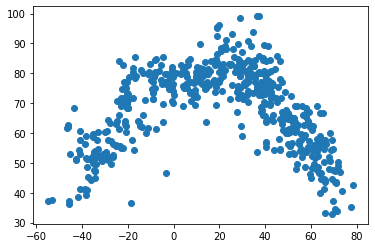

In [28]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"])

## Latitude vs. Humidity Plot

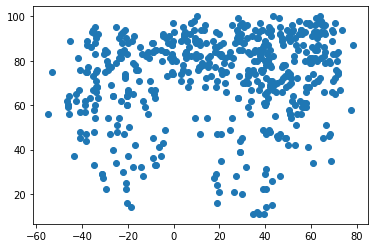

In [29]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])

## Latitude vs. Cloudiness Plot

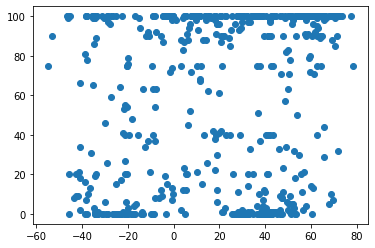

In [30]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])

## Latitude vs. Wind Speed Plot

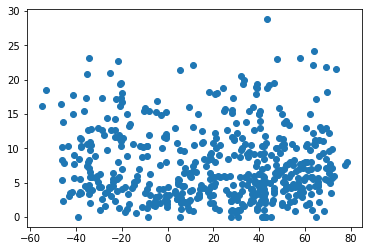

In [31]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])

## Linear Regression

In [40]:
 north_h = weather_data.loc[weather_data["Lat"]>=0]
 south_h = weather_data.loc[weather_data["Lat"]<0]

In [41]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.7583627515845713


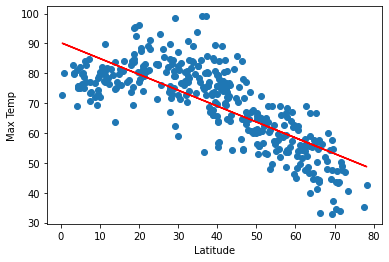

In [43]:
x= north_h["Lat"]
y=north_h["Max Temp"]
line_regr(x, y, "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.76195246025119


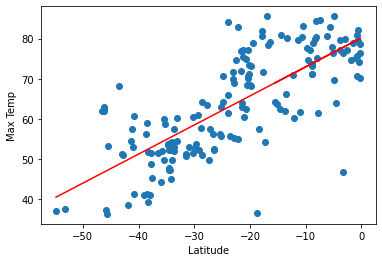

In [44]:
x= south_h["Lat"]
y=south_h["Max Temp"]
line_regr(x, y, "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: -0.012285786577650297


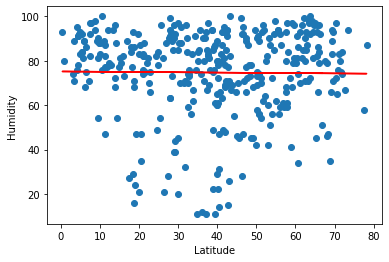

In [45]:
x= north_h["Lat"]
y=north_h["Humidity"]
line_regr(x, y, "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.1421258798942948


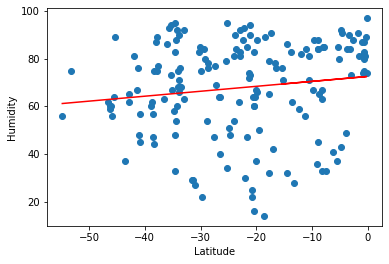

In [46]:
x= south_h["Lat"]
y=south_h["Humidity"]
line_regr(x, y, "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.04912981693228805


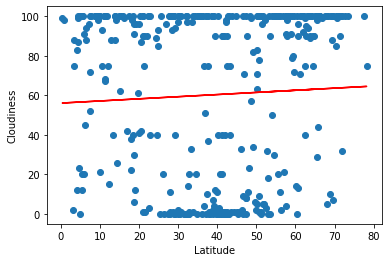

In [47]:
x= north_h["Lat"]
y=north_h["Cloudiness"]
line_regr(x, y, "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.0961258826801177


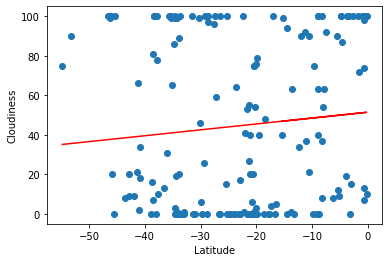

In [48]:
x= south_h["Lat"]
y=south_h["Cloudiness"]
line_regr(x, y, "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.09559916945242859


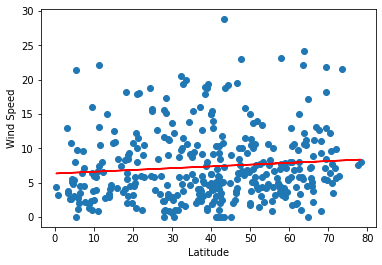

In [49]:
x= north_h["Lat"]
y=north_h["Wind Speed"]
line_regr(x, y, "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.0961258826801177


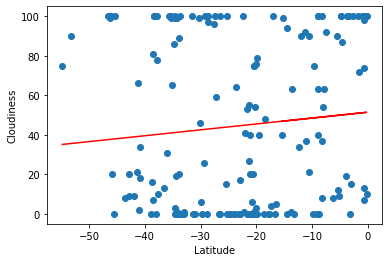

In [50]:
x= south_h["Lat"]
y=south_h["Cloudiness"]
line_regr(x, y, "Cloudiness")